In [34]:
#Importando as bibliotecas que serão usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
#Carregando os dados a serem analisados
iris_data = pd.read_csv("iris.csv")

## Entedendo os dados

In [37]:
#Visualizando as 05 primeiras linhas do DataFrame
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
#Visualizando as 05 ultimas linhas do DataFrame
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Verificando as colunas do Dataset
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Verificando a quantidade de Linhas e Colunas
iris_data.shape

(150, 6)

In [7]:
#Verificando a quantidade de espécies presente no DataSet
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#Verificando se existe valores nulos
iris_data.isna().sum().sort_values(ascending=False)


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Verificando a Distribuição dos dados no DataSet
- Espécies

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


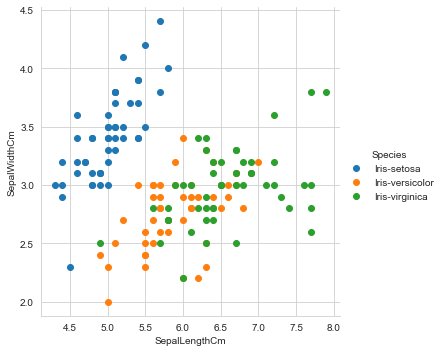

In [15]:
sns.set_style('whitegrid');
sns.FacetGrid(iris_data,hue='Species',size=5).map(plt.scatter,
'SepalLengthCm', 'SepalWidthCm').add_legend();
plt.show();

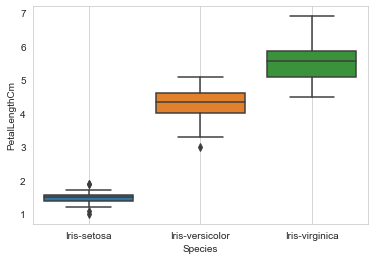

In [16]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris_data)
plt.grid()
plt.show()

c:\Users\carlo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


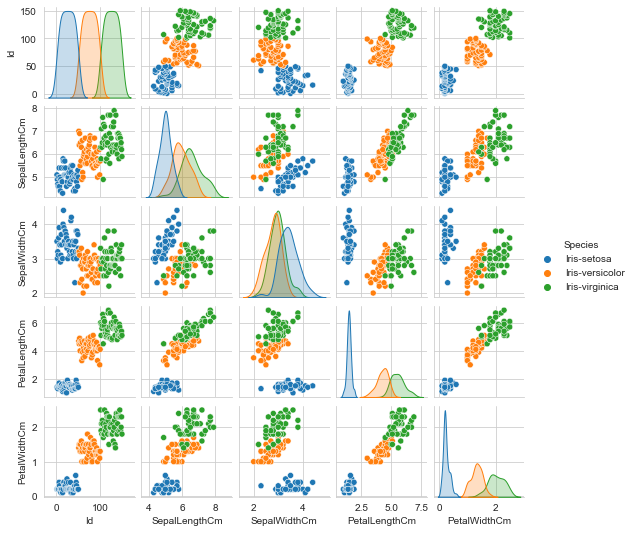

In [17]:
sns.set_style('whitegrid')
sns.pairplot(iris_data,hue='Species',size=1.5)
plt.show()

## Classificação do Modelo
- Treinamento
- Predição

In [19]:
# Dividir o dataset em variáveis independentes (features) e variável dependente (target)
X = iris_data.drop("Species", axis=1)  # Assumindo que a coluna target se chama 'species'
y = iris_data["Species"]

In [31]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Treinar um modelo k-NN
knn = KNeighborsClassifier(n_neighbors=3)

In [33]:
# Avaliar usando validação cruzada
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold cross-validation

print(f"Scores de validação cruzada: {cv_scores}")
print(f"Média dos scores de validação cruzada: {cv_scores.mean():.2f}")

Scores de validação cruzada: [0.96666667 1.         1.         1.         1.        ]
Média dos scores de validação cruzada: 0.99


In [35]:
# Para comparar, vamos fazer a divisão tradicional treino/teste e avaliação
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinar e prever
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [36]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia no conjunto de teste: 1.00
Relatório de Classificação:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Interpretação dos Resultados

- **Scores de Validação Cruzada**: Mostra as acurácias obtidas em cada uma das 5 divisões do conjunto de dados.
- **Média dos Scores de Validação Cruzada**: Fornece uma estimativa geral da performance do modelo.
- **Acurácia no Conjunto de Teste**: Mostra a acurácia no conjunto de teste separado.
- **Relatório de Classificação**: Exibe métricas detalhadas (precisão, recall e F1-score) para cada classe.
- **Matriz de Confusão**: Apresenta uma tabela que permite visualizar os acertos e erros de classificação do modelo.

## Possíveis Razões para Acurácia Alta

- **Dataset Bem Separado**: O dataset Iris é conhecido por ter classes bem separáveis.
- **Divisão Favorável**: A divisão aleatória pode ter resultado em conjuntos de treino e teste bem representativos.
- **Modelo Adequado**: k-NN é adequado para este tipo de dados, especialmente após a normalização.
